<a href="https://colab.research.google.com/github/leosmundim/analise_comparativo_COVID_por_cidade/blob/main/Analise_Comparativo_COVID_Cidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#base: https://covid.saude.gov.br/

import pandas as pd
df1 = pd.read_csv('/content/HIST_PAINEL_COVIDBR_2020_Parte1_28jul2021.csv', sep = ";")  # (Comentar essa linha)
df2 = pd.read_csv('/content/HIST_PAINEL_COVIDBR_2020_Parte2_28jul2021.csv', sep = ";")
df3 = pd.read_csv('/content/HIST_PAINEL_COVIDBR_2021_Parte1_28jul2021.csv', sep = ";")
df4 = pd.read_csv('/content/HIST_PAINEL_COVIDBR_2021_Parte2_28jul2021.csv', sep = ";")
df_temp = df1.append(df2)
df_temp2 = df_temp.append(df3)
df = df_temp2.append(df4)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748559 entries, 0 to 157331
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          float64
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(7), int64(5), object(5)
memory usage: 377.5+ MB


In [ ]:
import datetime

#Escolha as Cidades
city1 = 'Monte Carmelo'
city2 = 'Uberlândia'
city3 = 'São Paulo'

#Selecionar as linhas nas quais o valor da coluna está listado (no caso as cidades)
cidades = [city1, city2, city3]
indicador = df.municipio.isin(cidades)
indicador

df_municipios = df[indicador][['municipio', 'casosAcumulado','obitosAcumulado','casosNovos','Recuperadosnovos','data','populacaoTCU2019']]
df_municipios['data'] = pd.to_datetime(df_municipios['data'])
df_municipios['anomes'] = df_municipios['data'].dt.strftime("%Y-%m")
df_municipios = df_municipios.set_index('data')

#Escolha a variável a ser analisada
variavel = 'casosNovos'

#Construindo o data frame com as informações ecolhidas
x  = df_municipios[df_municipios['municipio'] == city1].index
y1 = df_municipios[df_municipios['municipio'] == city1][variavel]
y2 = df_municipios[df_municipios['municipio'] == city2][variavel]
y3 = df_municipios[df_municipios['municipio'] == city3][variavel]
y4 = df_municipios[df_municipios['municipio'] == city1]['populacaoTCU2019']
y5 = df_municipios[df_municipios['municipio'] == city2]['populacaoTCU2019']
y6 = df_municipios[df_municipios['municipio'] == city3]['populacaoTCU2019']
df_conj = pd.DataFrame({'Período': x, city1: y1, city2: y2, city3:y3, 'pop1': y4, 'pop2': y5, 'pop3': y6 })

df_conj['tx_1'] = df_conj[city1]/df_conj['pop1']*10000
df_conj['tx_2'] = df_conj[city2]/df_conj['pop2']*10000
df_conj['tx_3'] = df_conj[city3]/df_conj['pop3']*10000
df_conj.head()

,Período,Monte Carmelo,Uberlândia,São Paulo,pop1,pop2,pop3,tx_1,tx_2,tx_3
data,,,,,,,,,,
2020-03-27,2020-03-27,0,0,0,47809.0,691305.0,12252023.0,0.0,0.000000,0.000000
2020-03-28,2020-03-28,0,7,1149,47809.0,691305.0,12252023.0,0.0,0.101258,0.937804
2020-03-29,2020-03-29,0,0,34,47809.0,691305.0,12252023.0,0.0,0.000000,0.027751
2020-03-30,2020-03-30,0,3,50,47809.0,691305.0,12252023.0,0.0,0.043396,0.040810
2020-03-31,2020-03-31,0,0,652,47809.0,691305.0,12252023.0,0.0,0.000000,0.532157


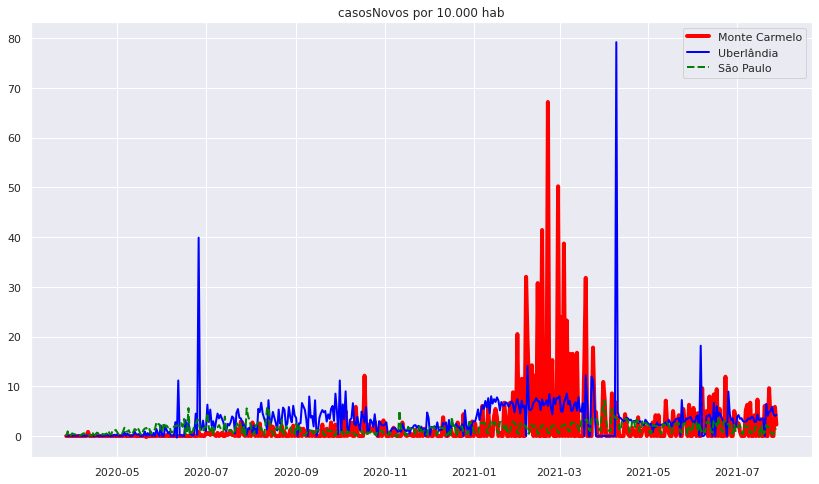

In [ ]:
#Gerando o Gráfico
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data

sns.set(rc={'figure.figsize':(14, 8)})

# multiple line plot
titulo = variavel + ' por 10.000 hab'
plt.title(titulo)
plt.plot( 'Período', 'tx_1', data=df_conj, marker='', markerfacecolor='red', markersize=12, color='red', linewidth=4, label=city1)
plt.plot( 'Período', 'tx_2', data=df_conj, marker='', color='blue', linewidth=2, label=city2)
plt.plot( 'Período', 'tx_3', data=df_conj, marker='', color='green', linewidth=2, linestyle='dashed', label=city3)
plt.legend()